# Dask vs Numpy
Remember when we compared CUPy with Numpy

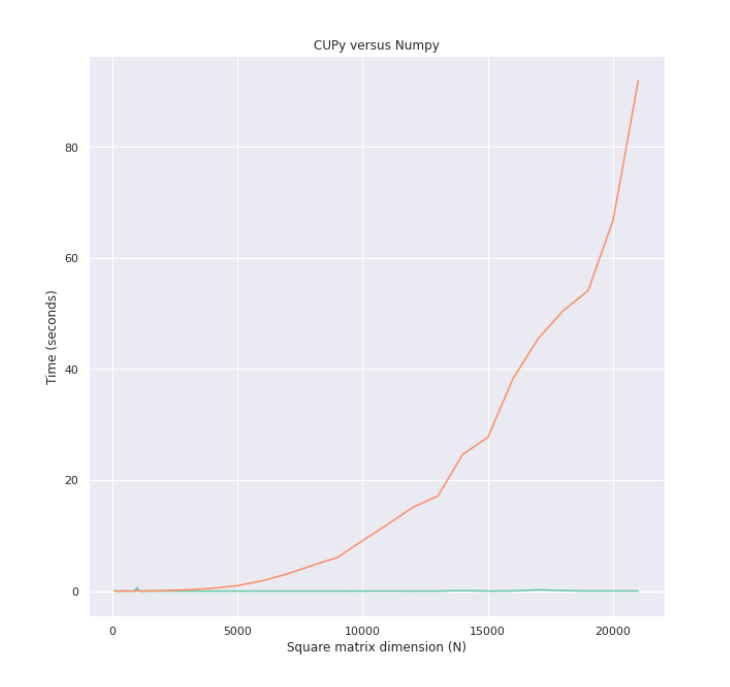

In [ ]:
!pip install dask
!pip install tqdm
!pip install seaborn
!pip install faker

In [ ]:
# import libraries
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm, trange
import time
import dask.array as da

In [ ]:
N = 100000
x = da.random.random((N,N),chunks=(1000, 1000))
x

## Dask versus Numpy

In [ ]:
def npmultiply( N=10 ):
    a = np.random.rand(N,N)
    b = np.random.rand(N,N)
    t1 = time.time()
    c = np.matmul(a,b,out=None)
    t2 = time.time()
    total = t2-t1
    return total

In [ ]:
def daskmultiply( N=10 ):
    a = da.random.random((N,N),chunks=(1000, 1000))
    b = da.random.random((N,N),chunks=(1000, 1000))
    t1 = time.time()
    c = da.matmul(a,b)
    t2 = time.time()
    total = t2-t1
    return total

In [ ]:
# create empty data frame
df = pd.DataFrame(columns=['N','Dask','CPU'])

 # compute statistics
for N in tqdm(range(100,2500,10)):
    df.loc[len(df.index)] = [N+1,daskmultiply(N+1),npmultiply(N+1)]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(10, 10)}) #width=3, #height=4
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(data=df, x='N', y='Dask', label='Dask')
sns.lineplot(data=df, x='N', y='CPU', label='CPU')
plt.title('Dask versus Numpy')
plt.xlabel('Square matrix dimension (N)')
plt.ylabel('Time (seconds)')
plt.legend(loc="upper left")
plt.show()

## Large datasets

In [ ]:
from faker import Faker
fake = Faker()
Faker.seed(1234567890)

file = open('fake_dataset.tsv', 'w')
file.write('SSN\tName\tPhone number\tAddress\tCompany\tBank\tCredit Card\tCredit Card Expiration\tCredit Card Provider\n')

# not really large
for n in tqdm(range(1000)):
    ssn = fake.ssn()
    name = fake.name()
    address = fake.address()
    phone_number = fake.phone_number()
    company = fake.company()
    bank = fake.company()
    credit_card = fake.credit_card_number()
    credit_card_expiration = fake.credit_card_expire()
    credit_card_provider = fake.credit_card_provider()
    
    file.write('{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}\t{8}\n'.format(ssn, name, phone_number,address,company,bank,credit_card,credit_card_expiration,credit_card_provider))
file.close()

In [ ]:
file = 'fake_dataset.tsv'

def load_data( file ):
    t1 = time.time()
    df = pd.read_csv( file, sep='\t' )
    t2 = time.time()
    total = t2-t1
    print(total)
    return df

df = load_data( file )

In [ ]:
import dask.dataframe as dd

file = 'fake_dataset.tsv'

def load_data2( file ):
    t1 = time.time()
    df = dd.read_csv( file, sep='\t' )
    t2 = time.time()
    total = t2-t1
    print(total)
    return df

df = load_data( file )

## Are you using OpenOnDemand?
Let's try it.

In [ ]:
# INSERT CODE HERE
!unzip data.zip